# **HCC1806 DropSeq**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from scipy.sparse import csr_matrix
from scipy.stats import skew, kurtosis

import matplotlib
import matplotlib.pyplot as plt

## EDA

We start our analysis by  performorming some basic exploratory data analysis on our training dataset to better understand both its meaning and its features.

In [2]:
dfn = pd.read_csv("HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [3]:
dfn.shape

(3000, 14682)

In [4]:
dfn.head()

,"""AAAAAACCCGGC_Normoxia""","""AAAACCGGATGC_Normoxia""","""AAAACGAGCTAG_Normoxia""","""AAAACTTCCCCG_Normoxia""","""AAAAGCCTACCC_Normoxia""","""AAACACAAATCT_Normoxia""","""AAACCAAGCCCA_Normoxia""","""AAACCATGCACT_Normoxia""","""AAACCTCCGGCT_Normoxia""","""AAACGCCGGTCC_Normoxia""",...,"""TTTTCTGATGGT_Hypoxia""","""TTTTGATTCAGA_Hypoxia""","""TTTTGCAACTGA_Hypoxia""","""TTTTGCCGGGCC_Hypoxia""","""TTTTGTTAGCCT_Hypoxia""","""TTTTTACCAATC_Hypoxia""","""TTTTTCCGTGCA_Hypoxia""","""TTTTTGCCTGGG_Hypoxia""","""TTTTTGTAACAG_Hypoxia""","""TTTTTTTGAATC_Hypoxia"""
"""H1-5""",2,2,5,1,0,0,0,0,1,0,...,0,1,0,2,1,0,0,0,3,1
"""MALAT1""",3,3,2,3,12,3,1,2,0,0,...,3,1,1,1,4,0,4,1,3,6
"""MT-RNR2""",0,0,0,0,0,0,0,0,0,1,...,1,2,2,2,0,0,1,0,1,0
"""ARVCF""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""BCYRN1""",0,1,1,0,0,1,1,2,0,3,...,1,1,0,1,1,0,0,1,0,0


In [5]:
dfn.describe()

,"""AAAAAACCCGGC_Normoxia""","""AAAACCGGATGC_Normoxia""","""AAAACGAGCTAG_Normoxia""","""AAAACTTCCCCG_Normoxia""","""AAAAGCCTACCC_Normoxia""","""AAACACAAATCT_Normoxia""","""AAACCAAGCCCA_Normoxia""","""AAACCATGCACT_Normoxia""","""AAACCTCCGGCT_Normoxia""","""AAACGCCGGTCC_Normoxia""",...,"""TTTTCTGATGGT_Hypoxia""","""TTTTGATTCAGA_Hypoxia""","""TTTTGCAACTGA_Hypoxia""","""TTTTGCCGGGCC_Hypoxia""","""TTTTGTTAGCCT_Hypoxia""","""TTTTTACCAATC_Hypoxia""","""TTTTTCCGTGCA_Hypoxia""","""TTTTTGCCTGGG_Hypoxia""","""TTTTTGTAACAG_Hypoxia""","""TTTTTTTGAATC_Hypoxia"""
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.02900,0.041667,0.024333,0.021667,0.029667,0.020000,0.036000,0.02600,0.034000,0.029333,...,0.043000,0.049667,0.037000,0.047667,0.057000,0.023333,0.041667,0.041667,0.043333,0.040000
std,0.23276,0.309778,0.231860,0.189409,0.323761,0.170126,0.250449,0.23525,0.231362,0.218683,...,0.271739,0.319219,0.279864,0.259648,0.304053,0.214797,0.236536,0.285116,0.267356,0.282418
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.00000,9.000000,7.000000,4.000000,12.000000,3.000000,4.000000,6.00000,4.000000,4.000000,...,4.000000,7.000000,7.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000


In [6]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, "H1-5" to "ZNF682"
Columns: 14682 entries, "AAAAAACCCGGC_Normoxia" to "TTTTTTTGAATC_Hypoxia"
dtypes: int64(14682)
memory usage: 336.1+ MB


We transpose our dataframe so that the rows represent cells and the columns genes, which will facilitate some parts of our analysis later on.

In [7]:
dfn_t = dfn.T

In [8]:
dfn_t.shape

(14682, 3000)

In [9]:
dfn_t.head()

,"""H1-5""","""MALAT1""","""MT-RNR2""","""ARVCF""","""BCYRN1""","""ATXN7L2""","""IGFBP3""","""H1-3""","""CTIF""","""RNF123""",...,"""BATF3""","""CDKN3""","""DLD""","""PMPCA""","""ZNF165""","""SCCPDH""","""NTAN1""","""CLIP2""","""DUSP23""","""ZNF682"""
"""AAAAAACCCGGC_Normoxia""",2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACCGGATGC_Normoxia""",2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACGAGCTAG_Normoxia""",5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAACTTCCCCG_Normoxia""",1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AAAAGCCTACCC_Normoxia""",0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dfn_t.describe()

,"""H1-5""","""MALAT1""","""MT-RNR2""","""ARVCF""","""BCYRN1""","""ATXN7L2""","""IGFBP3""","""H1-3""","""CTIF""","""RNF123""",...,"""BATF3""","""CDKN3""","""DLD""","""PMPCA""","""ZNF165""","""SCCPDH""","""NTAN1""","""CLIP2""","""DUSP23""","""ZNF682"""
count,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,...,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000,14682.000000
mean,0.709372,1.899333,0.861327,0.001294,1.038142,0.001498,0.371067,0.675862,0.000613,0.000613,...,0.000477,0.045498,0.026563,0.010693,0.004155,0.009672,0.006471,0.002997,0.019003,0.000477
std,1.680187,2.790889,1.470822,0.047393,1.634813,0.052176,0.905313,1.292052,0.027366,0.027366,...,0.024755,0.239997,0.189220,0.121667,0.073238,0.114546,0.090554,0.064917,0.156962,0.024755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58.000000,110.000000,23.000000,4.000000,33.000000,3.000000,14.000000,22.000000,2.000000,2.000000,...,2.000000,4.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000


Next we:
- chech for any missing values and duplicates since occurance of errors is always a possibility and we would like to avoid it;
- ensure that all values we deal with are integers.

In [11]:
dfn_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14682 entries, "AAAAAACCCGGC_Normoxia" to "TTTTTTTGAATC_Hypoxia"
Columns: 3000 entries, "H1-5" to "ZNF682"
dtypes: int64(3000)
memory usage: 336.7+ MB


In [12]:
dfn.isnull().sum().sum()

0

In [13]:
duplicate_rows_tot = dfn_t.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot} duplicate rows.")

There are 0 duplicate rows.


In [14]:
duplicate_cols = dfn_t.T.duplicated(keep=False).sum()
print(f"There are {duplicate_cols} duplicate columns.")

There are 0 duplicate columns.


At the end no missing values and no duplicates were found.

### Sparcity

A sparsity heatmap is a powerful visualization tool to understand the distribution of sparsity in the dataset and we decided to implement it.
Since we transposed the dataset we find on the y-axis the features (or genes) , while on the x-axis we encounter the individual samples.

<Axes: >

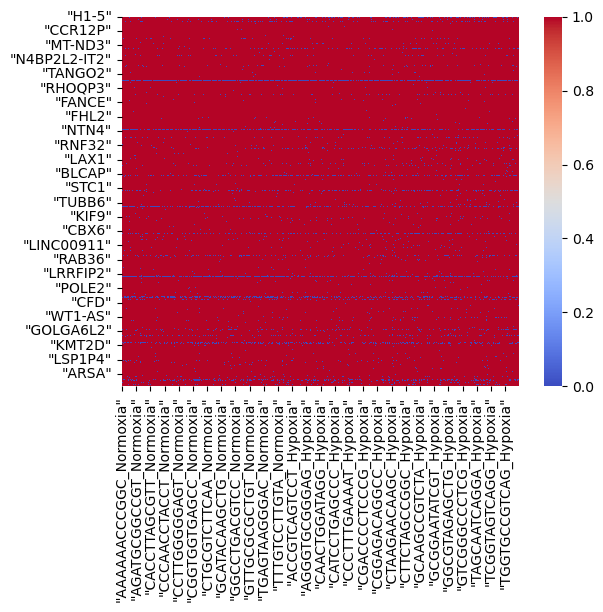

In [15]:
sns.heatmap(dfn == 0, cmap="coolwarm")

In [16]:
sparse_dfn = csr_matrix(dfn.values) # Converts DataFrame into a CSR sparse matrix
print(sparse_dfn)

density_n = np.count_nonzero(sparse_dfn.toarray()) / np.prod(sparse_dfn.shape)
print(f"Sparsity: {1 - density_n:.2%}")

  (0, 0)	2
  (0, 1)	2
  (0, 2)	5
  (0, 3)	1
  (0, 8)	1
  (0, 11)	1
  (0, 12)	1
  (0, 15)	1
  (0, 16)	1
  (0, 18)	2
  (0, 19)	1
  (0, 20)	2
  (0, 21)	3
  (0, 24)	1
  (0, 27)	1
  (0, 30)	18
  (0, 31)	2
  (0, 32)	1
  (0, 33)	1
  (0, 35)	12
  (0, 38)	4
  (0, 42)	1
  (0, 48)	3
  (0, 50)	1
  (0, 51)	2
  :	:
  (2998, 13821)	1
  (2998, 13876)	1
  (2998, 13936)	2
  (2998, 14020)	1
  (2998, 14054)	1
  (2998, 14056)	1
  (2998, 14059)	1
  (2998, 14123)	1
  (2998, 14139)	2
  (2998, 14182)	1
  (2998, 14235)	1
  (2998, 14262)	1
  (2998, 14288)	1
  (2998, 14357)	1
  (2998, 14446)	1
  (2998, 14457)	1
  (2998, 14493)	1
  (2998, 14538)	1
  (2998, 14543)	1
  (2999, 157)	1
  (2999, 6644)	1
  (2999, 12562)	1
  (2999, 13067)	2
  (2999, 14167)	1
  (2999, 14236)	1
Sparsity: 97.64%


The level of sparsity is 97.64% indicating that the data obtained using DropSeq is much more sparse than the SmartSeq

Sparse DropSeq data can be expected because of the sequencing technique, which involves encapsulating individual cells in nanoliter-sized droplets and then sequencing the RNA from each droplet separately. Since each droplet contains only a single cell, the resulting sequencing data is inherently sparse and so the sequencing reads for each gene are only observed in a subset of the cells.

### Skewness and Kurtosis

Skweness is the measure of the lack of symmetry in the data set and kurtosis is the measure of peakness of distribution

Text(0.5, 1.0, 'Distribution of skewness values for genes')

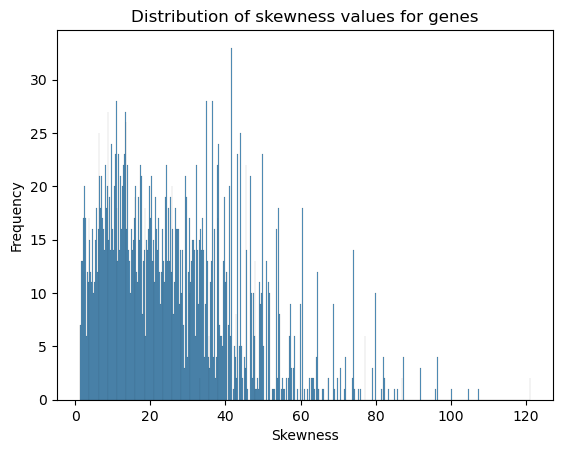

In [17]:
column_num = np.shape(dfn)[1]
cells_n = list(dfn.columns)

skewness = dfn.apply(skew, axis=1)
sns.histplot(skewness, bins=500)  # skewness of genes
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of skewness values for genes')

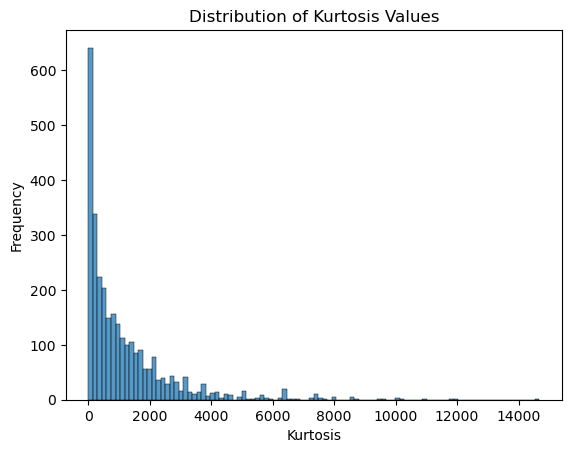

In [18]:
kurt = kurtosis(dfn, axis=1)

sns.histplot(kurt, bins=100)
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.title('Distribution of Kurtosis Values')
plt.show()

### Distribution

We go ahead with our investigation analysing the distribution of data.

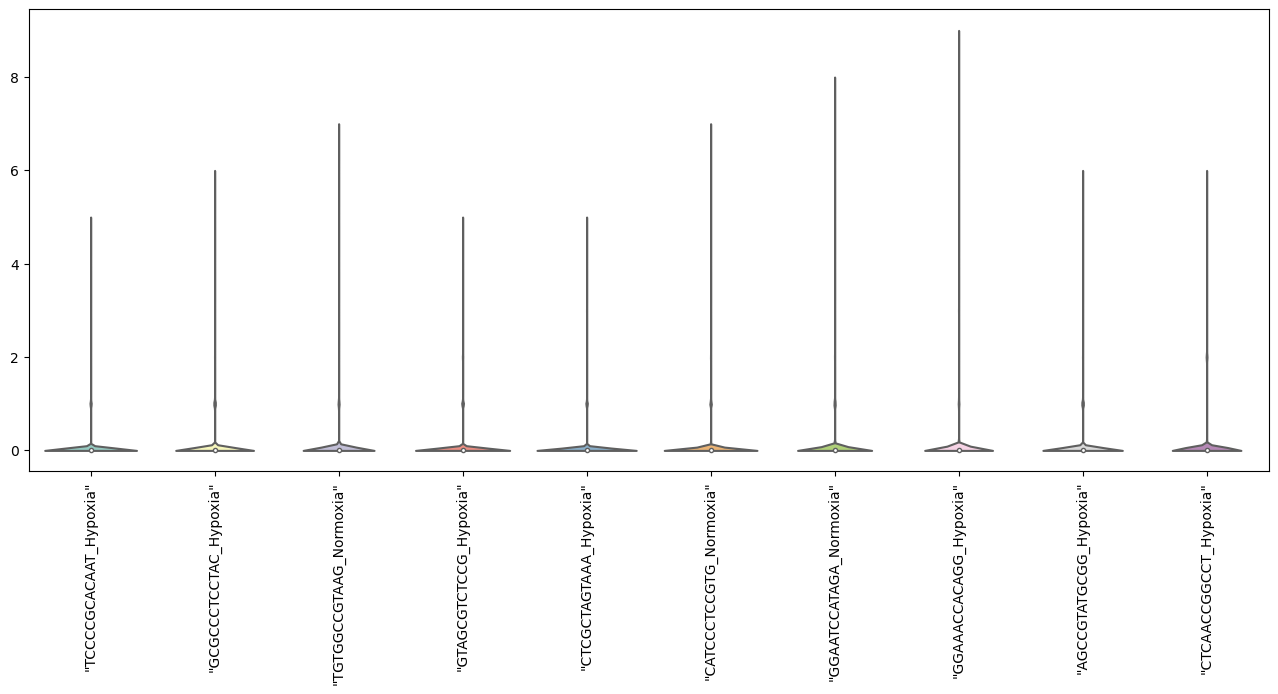

In [19]:
n = 10
random_cells_n = np.random.choice(dfn.columns, size=n, replace=False)
plt.figure(figsize=(16,6))
violin_plot = sns.violinplot(data=dfn[random_cells_n], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

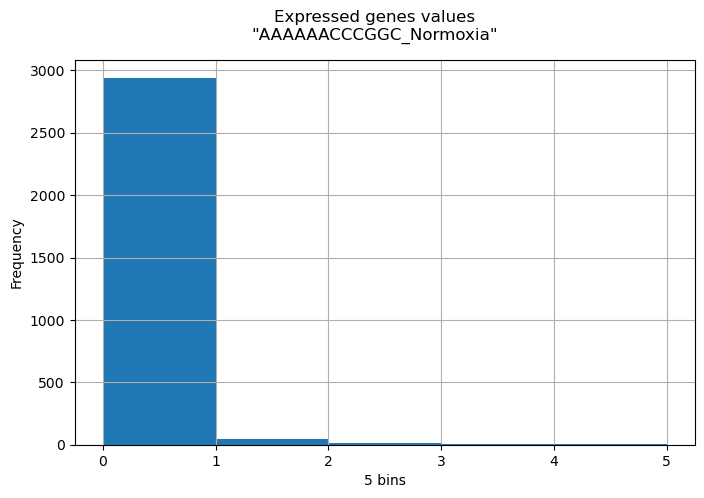

In [20]:
#histogram of a single column
col = dfn.iloc[:, 0]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
col.hist(bins=5)
plt.suptitle(f"Expressed genes values\n{col.name}")
axs.set_xlabel("5 bins")
axs.set_ylabel("Frequency")
plt.show()


By looking at the plot it is easy to see that distributions are highly non-normal, very skewed with heavy tails.

### Correlation

Correlation analysis is a bi-variate analysis measure which describes the association between different variables, giving us an idea about the degree of the relationship of the two.Moreover, implementation of the Pearson’s correlation coefficient is also shown below. The latter is a measure of the strength of a linear association between two variables and is denoted by r. Basically, a Pearson’s correlation attempts to draw a line of best fit through two variables' data. The Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit.

In [21]:
dfn.head()

,"""AAAAAACCCGGC_Normoxia""","""AAAACCGGATGC_Normoxia""","""AAAACGAGCTAG_Normoxia""","""AAAACTTCCCCG_Normoxia""","""AAAAGCCTACCC_Normoxia""","""AAACACAAATCT_Normoxia""","""AAACCAAGCCCA_Normoxia""","""AAACCATGCACT_Normoxia""","""AAACCTCCGGCT_Normoxia""","""AAACGCCGGTCC_Normoxia""",...,"""TTTTCTGATGGT_Hypoxia""","""TTTTGATTCAGA_Hypoxia""","""TTTTGCAACTGA_Hypoxia""","""TTTTGCCGGGCC_Hypoxia""","""TTTTGTTAGCCT_Hypoxia""","""TTTTTACCAATC_Hypoxia""","""TTTTTCCGTGCA_Hypoxia""","""TTTTTGCCTGGG_Hypoxia""","""TTTTTGTAACAG_Hypoxia""","""TTTTTTTGAATC_Hypoxia"""
"""H1-5""",2,2,5,1,0,0,0,0,1,0,...,0,1,0,2,1,0,0,0,3,1
"""MALAT1""",3,3,2,3,12,3,1,2,0,0,...,3,1,1,1,4,0,4,1,3,6
"""MT-RNR2""",0,0,0,0,0,0,0,0,0,1,...,1,2,2,2,0,0,1,0,1,0
"""ARVCF""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""BCYRN1""",0,1,1,0,0,1,1,2,0,3,...,1,1,0,1,1,0,0,1,0,0


Now we want to check correlation between samples using the Pearson correlation coefficient

In [22]:
#pearson correlation coefficient
random.seed(42)
random_columns = [i for i in range(0,dfn.shape[0])]
random.shuffle(random_columns)

corr_matrix_p = dfn.iloc[:, random_columns[:1000]].corr(method = 'pearson') #correlation matrix made of 250 random columns

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of cells included:", corr_matrix_p.shape[0])
print("Average between minimum and maximum correlation:", average)
print("Average correlation of expression profiles between cells:", corr_matrix_p.mean().mean())


Number of cells included: 1000
Average between minimum and maximum correlation: 0.49427500357611437
Average correlation of expression profiles between cells: 0.3443306654486868


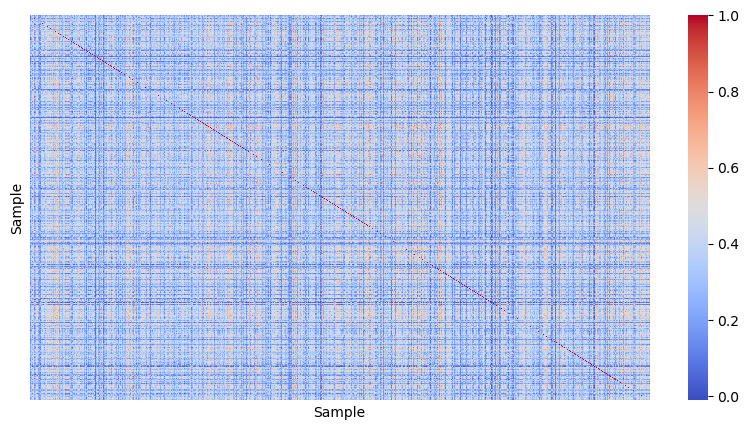

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

The analysis of the correlations between cell expression profiles reveals a generally mild positive correlation, with an average Pearson correlation coefficient of 0.344. This suggests that there are similarities in gene expression patterns across the cells, with increasing expression in one cell generally associated with increased expression in other cells. However, the strength of these relationships is not very high on average, indicating a considerable amount of variability in expression profiles among the cells.

### Non zero gene expression

To go on, we focus on the investigation of distribution of non zero values.

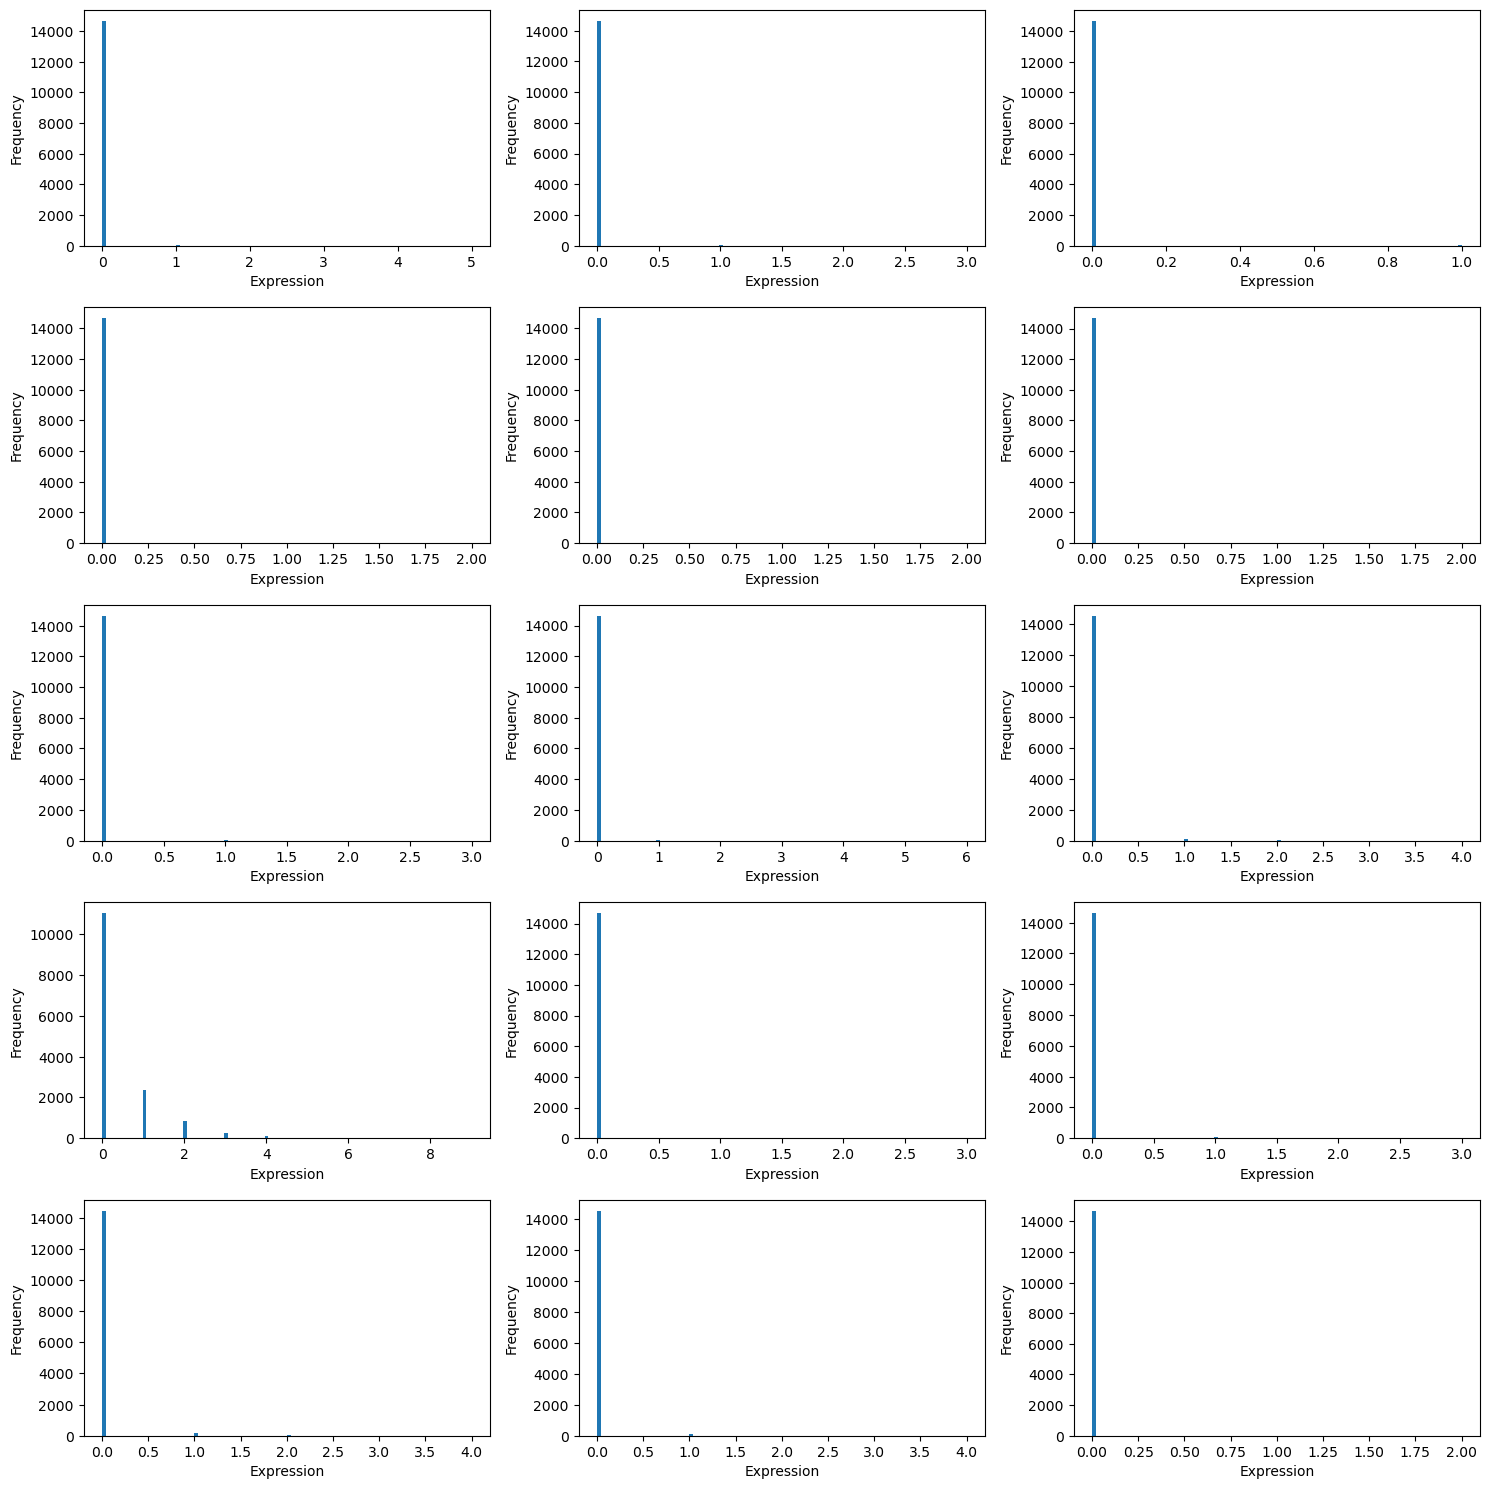

In [24]:
data = dfn.T
data = data.loc[(data!=0).any(axis=1), :]
genes = np.random.choice(data.columns, size=15, replace=False)
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
for i, gene in enumerate(genes):
    gene_data= data[gene]
    row_num= i//3
    col_num= i%3
    ax[row_num, col_num].hist(gene_data, bins=100)
    ax[row_num, col_num].set_xlabel('Expression')
    ax[row_num, col_num].set_ylabel('Frequency')
fig.tight_layout()
plt.show()

We notice a unimodal behaviour in all of the cases (meaning that the data has a single peak) just as it had in smartseq.
Therefore, we conclude that the distribution is either Poisson or Negative Binomial. 

Text(0, 0.5, 'Variance')

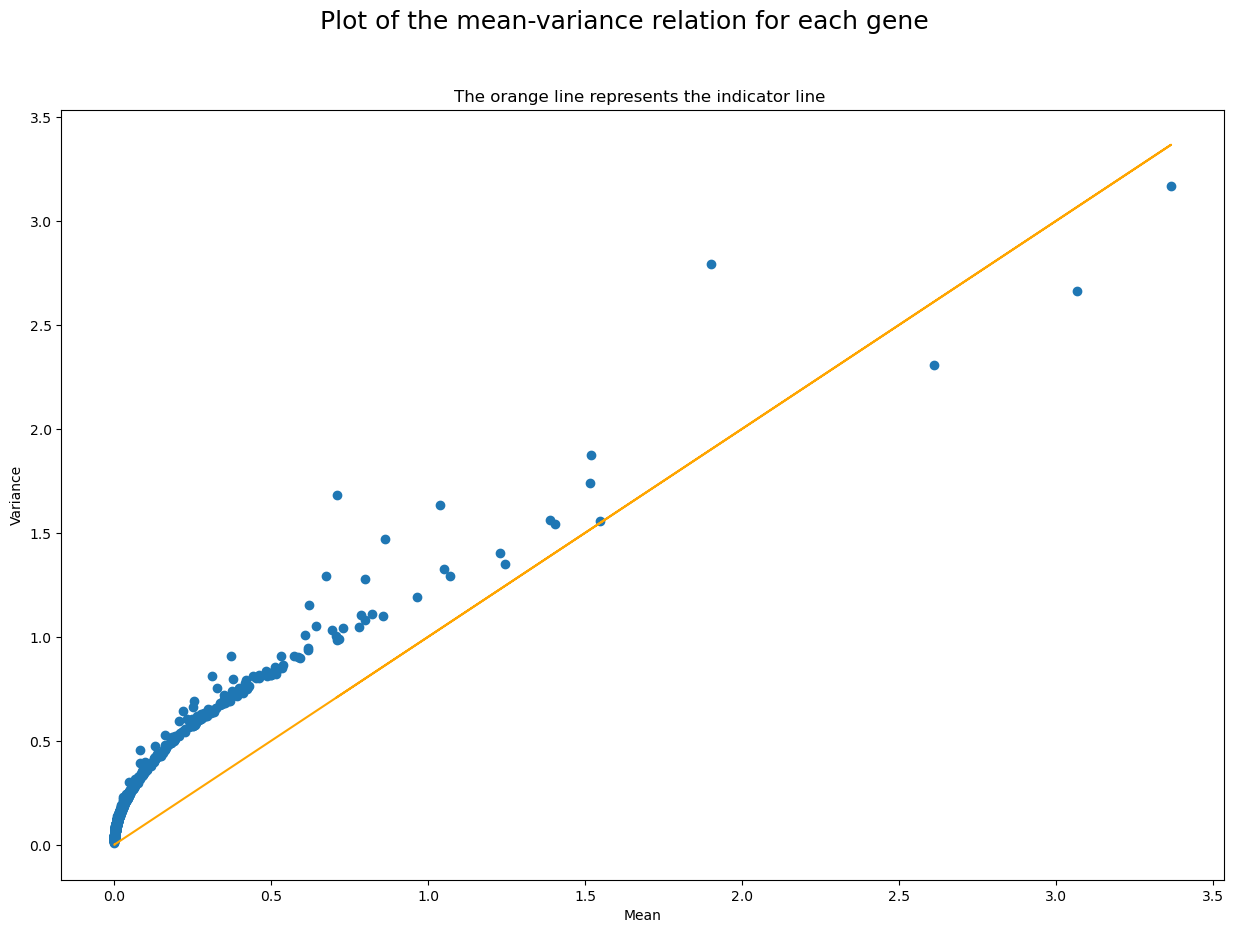

In [25]:
mean_vector = dfn_t.describe().iloc[1,:]
var_vector = dfn_t.describe().iloc[2,:]
plt.figure(figsize=(15, 10))
plt.scatter(mean_vector, var_vector)
plt.plot(mean_vector, mean_vector, color = "orange")
plt.title("The orange line represents the indicator line ", fontsize = 12)
plt.suptitle("Plot of the mean-variance relation for each gene", fontsize = 18)
plt.xlabel("Mean")
plt.ylabel("Variance")

In order to be more precise, we will plot the variance-mean relationship as well as variance-mean relationship after applying the logarithmic scale.

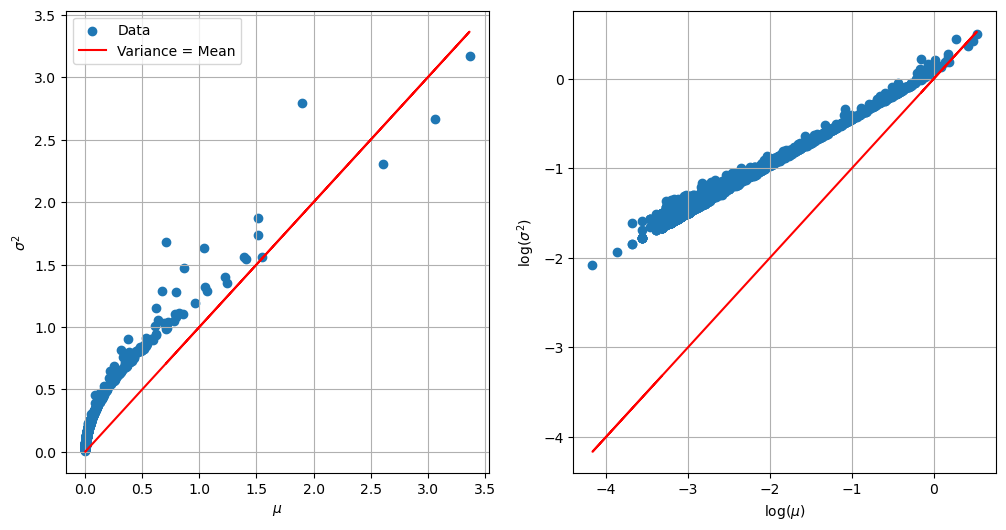

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot without logarithmic scale
ax[0].scatter(mean_vector, var_vector, label="Data")
ax[0].set_xlabel("$\mu$")
ax[0].set_ylabel("$\sigma^2$")
ax[0].grid(True)
ax[0].plot(mean_vector, mean_vector, color='r', label="Variance = Mean")
ax[0].legend()

# Scatter plot with logarithmic scale
ax[1].scatter(np.log10(mean_vector), np.log10(var_vector), label="Data")
ax[1].set_xlabel("$\log(\mu)$")
ax[1].set_ylabel("$\log(\sigma^2)$")
ax[1].grid(True)
ax[1].plot(np.log10(mean_vector), np.log10(mean_vector), color='r', label="Variance = Mean")

plt.show()

By looking at the plot above we deduce that mean-varience relationship is clearly not linear, and thus, the distribution is Negative Binomial. 

## Filtering

Filtering based on total read counts involves setting a threshold on the total number of reads (or counts) for each cell. Cells with counts below the threshold are typically considered to have low sequencing depth and may be filtered out from further analysis. This type of filtering aims to remove cells with low library sizes or poor quality data.

Filtering based on the number of non-zero genes, on the other hand, involves setting a threshold on the number of genes that have non-zero counts for each cell. Cells with a low number of expressed genes below the threshold may be considered low-quality or uninformative and can be excluded from downstream analysis.

While both filtering approaches can help remove low-quality or uninformative cells, they capture different aspects of the data. Filtering based on total read counts focuses on the overall sequencing depth of each cell, while filtering based on the number of non-zero genes examines the transcriptional activity and the diversity of expressed genes within each cell.

In [27]:
total_counts = np.sum(dfn, axis=0)

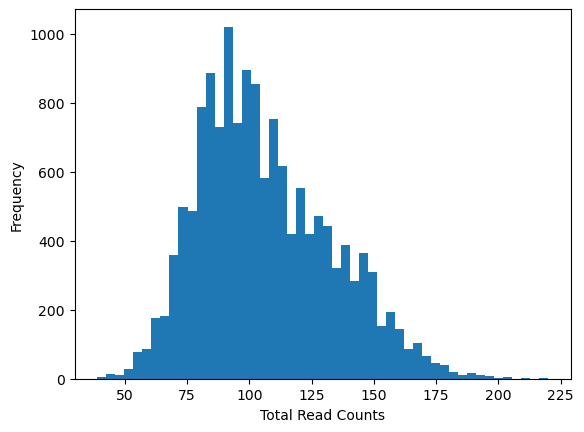

In [28]:
plt.hist(total_counts, bins=50)

plt.xlabel('Total Read Counts')
plt.ylabel('Frequency')

plt.show()

From the graph we decide to set the threshold at 70

In [29]:
dfn_filtered = dfn.loc[:, total_counts >= 70]

Now for the non-zero genes

In [30]:
nonzero_counts = np.count_nonzero(dfn_filtered, axis=0)

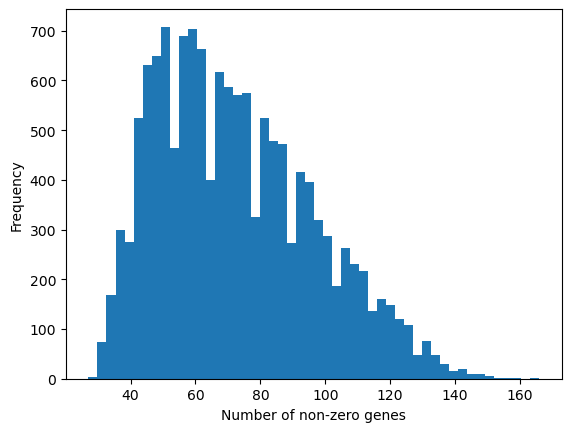

In [31]:
plt.hist(nonzero_counts, bins=50)
plt.xlabel('Number of non-zero genes')
plt.ylabel('Frequency')
plt.show()

We set the threshold at 35

In [32]:
dfn_filtered = dfn_filtered.loc[:, nonzero_counts >= 35]

In [33]:
dfn_filtered

,"""AAAAAACCCGGC_Normoxia""","""AAAACCGGATGC_Normoxia""","""AAAACGAGCTAG_Normoxia""","""AAAAGCCTACCC_Normoxia""","""AAACCAAGCCCA_Normoxia""","""AAACCATGCACT_Normoxia""","""AAACCTCCGGCT_Normoxia""","""AAACGCCGGTCC_Normoxia""","""AAACGCCGTTCC_Normoxia""","""AAACGGACGCTC_Normoxia""",...,"""TTTTCTGATGGT_Hypoxia""","""TTTTGATTCAGA_Hypoxia""","""TTTTGCAACTGA_Hypoxia""","""TTTTGCCGGGCC_Hypoxia""","""TTTTGTTAGCCT_Hypoxia""","""TTTTTACCAATC_Hypoxia""","""TTTTTCCGTGCA_Hypoxia""","""TTTTTGCCTGGG_Hypoxia""","""TTTTTGTAACAG_Hypoxia""","""TTTTTTTGAATC_Hypoxia"""
"""H1-5""",2,2,5,0,0,0,1,0,0,1,...,0,1,0,2,1,0,0,0,3,1
"""MALAT1""",3,3,2,12,1,2,0,0,5,1,...,3,1,1,1,4,0,4,1,3,6
"""MT-RNR2""",0,0,0,0,0,0,0,1,0,1,...,1,2,2,2,0,0,1,0,1,0
"""ARVCF""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""BCYRN1""",0,1,1,0,1,2,0,3,1,2,...,1,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""SCCPDH""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""NTAN1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"""CLIP2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DUSP23""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dfn = dfn_filtered.copy()

## PCA

We now go on with the dimensionality reduction techiniques. 

Also, as in all other data sets, we will first apply standard scaler and then perform PCA which is also called Principal component analysis.

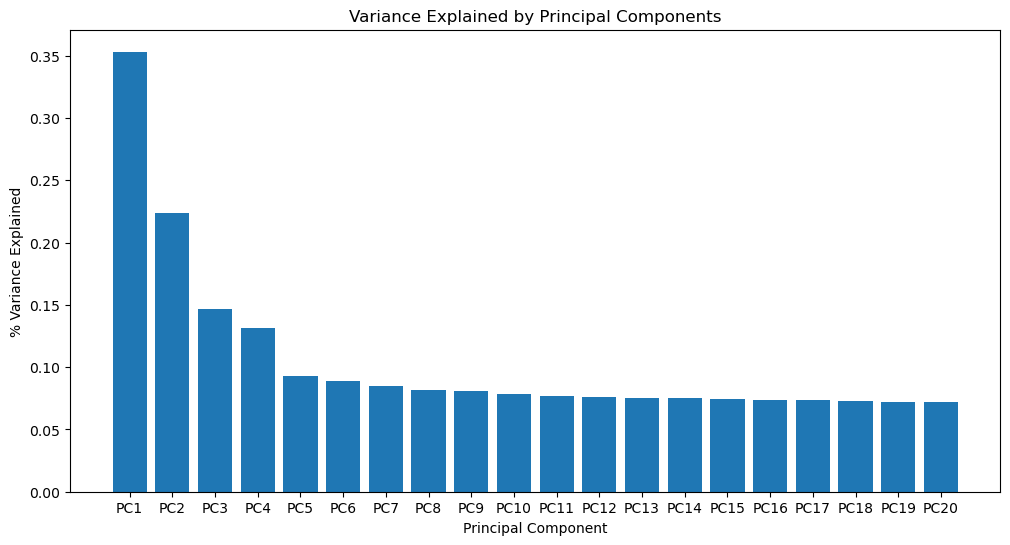

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df_standardized = pd.DataFrame(StandardScaler().fit_transform(dfn_filtered.transpose()), columns=dfn_filtered.transpose().columns, index=dfn_filtered.T.index)

pca_20 = PCA(n_components=20)
pca_20.fit(df_standardized)

# Plot the variance explained by each principal component
labels = ['PC{}'.format(i+1) for i in range(20)]
plt.figure(figsize = (12,6))
plt.bar(labels, pca_20.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

We can see from the histogram above that around 35% of the variance is explained by the first principle component, and around 23% by the second. Plots below are shown to better visualize the data. 

In [36]:
conditions = []
for cell in dfn.columns:
    if "Hypoxia" in cell:
        conditions.append("Hypoxia")
    else:
        conditions.append("Normoxia")


In [37]:
import plotly.express as px
pca = PCA(n_components=2)
components = pca.fit_transform(df_standardized)
fig = px.scatter(components, x=0, y=1, color=conditions)
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='2D PCA Scatter Plot'
)
fig.show()

In [38]:
pca_3 = PCA(n_components=3)
components = pca_3.fit_transform(df_standardized)

total_var = pca_3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=conditions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Clustering

As for SmartSeq we will use `KMeans()` to proceed with clustering. The reason behind it is that its output is easy to understand and it is one of the fastest algorithms performing on large datasets, as in our case.

In [39]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [40]:
Labels=pd.Series(df_standardized.index, index= df_standardized.index)
hypo_labels = Labels.str.contains('Hypo')
norm_labels = Labels.str.contains('Norm')


Labels[hypo_labels] = 'hypoxia'
Labels[norm_labels] = 'normoxia'

We have to apply PCA to the data set before clustering.

In [41]:
pca = PCA(n_components=2)  # or however many components you want to keep
pca_df = pca.fit_transform(df_standardized)

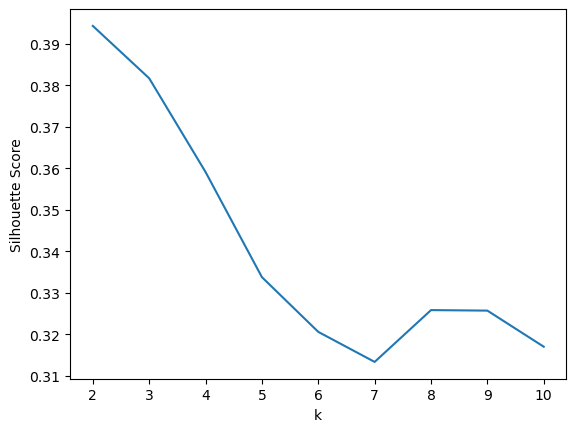

In [42]:
# Find the best k using the silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for various k values
plt.plot(k_values, silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

Since the silhouette score is the highest when k=2, we will choose exactly that value as  number of clusters. 

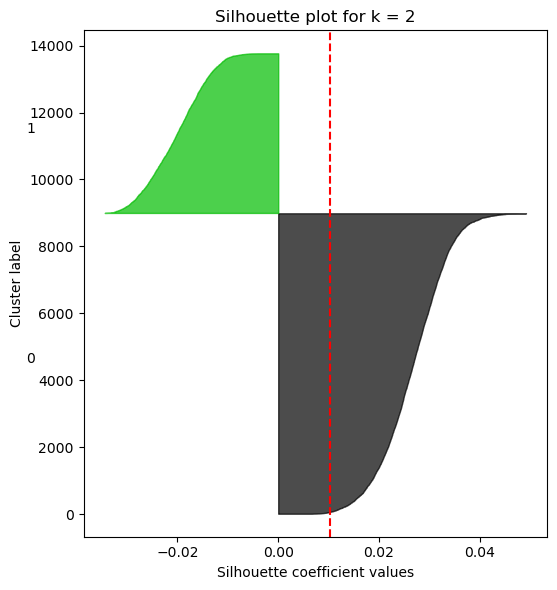

In [43]:
import matplotlib.gridspec as gridspec

k = 2

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(df_standardized)
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(df_standardized, cluster_labels)
sample_silhouette_values = silhouette_samples(df_standardized, cluster_labels)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 4])

# Silhouette plot
ax1 = plt.subplot(gs[0])
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title(f"Silhouette plot for k = {k}")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.tight_layout()
plt.show()

In [44]:
# Count the number of cells in each cluster
counts = np.bincount(kmeans.labels_)

# Print the counts
for i, count in enumerate(counts):
    print(f"Cluster {i} has {count} cells")

Cluster 0 has 8980 cells
Cluster 1 has 4771 cells


In [45]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(pca_df)
cluster_labels = kmeans.labels_

# Convert the official labels to numeric form for comparison
true_labels_numeric = Labels.replace({'hypoxia': 0, 'normoxia': 1})

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(true_labels_numeric, cluster_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.041225603671440715


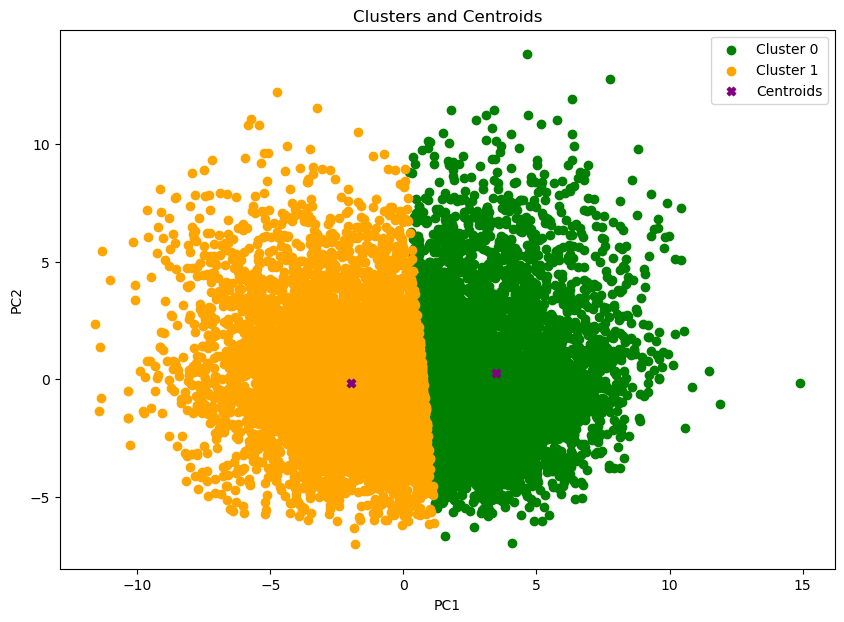

In [46]:
# Plotting the Centroids
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(10, 7))
for label, color in zip(set(cluster_labels), ['green', 'orange']):
    mask = cluster_labels == label
    plt.scatter(pca_df[mask, 0], pca_df[mask, 1], c=color, label=f'Cluster {label}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='purple', marker='X', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Supervised Learning

Just like in the MCF7 DropSeq data set we have a lot of samples, around 14000 to be precise. Therefore, for the same reason as before, 
we will implement only some models: 'SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest'. 

In [47]:
df_test = pd.read_csv('HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt', delimiter="\ ", engine='python', index_col=0)

In [48]:
conditions = []
for cell in dfn.columns:
    if "Hypoxia" in cell:
        conditions.append("Hypoxia")
    else:
        conditions.append("Normoxia")

In [49]:
# Convert target variable to binary encoding
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

# define train and test data
X_train = dfn.T
y_train = target_binary
X_test = df_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC(C=0.1, gamma=0.01, kernel= 'sigmoid'))   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC(loss='hinge', penalty="l2")) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression(C=0.1, penalty='l1', solver="saga"))
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier(alpha=0.01, eta0=20, learning_rate='constant', loss='hinge', penalty='l1'))
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=100))
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic"]:
       
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        pipeline.fit(X_train, y_train)
        
    else:
       
        pipeline.fit(X_train, y_train)
        
    
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))
 

+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   F1 Score |
|----+---------------+------------+-------------+----------+------------|
|  0 | svm           |   0.95273  |    0.963233 | 0.960525 |   0.961877 |
|  1 | linear_svm    |   0.914405 |    0.955558 | 0.904182 |   0.92916  |
|  2 | logistic      |   0.95462  |    0.972315 | 0.954434 |   0.963291 |
|  3 | sgd           |   0.861248 |    0.884669 | 0.884151 |   0.88441  |
|  4 | random_forest |   0.931567 |    0.912611 | 0.988403 |   0.948996 |
+----+---------------+------------+-------------+----------+------------+


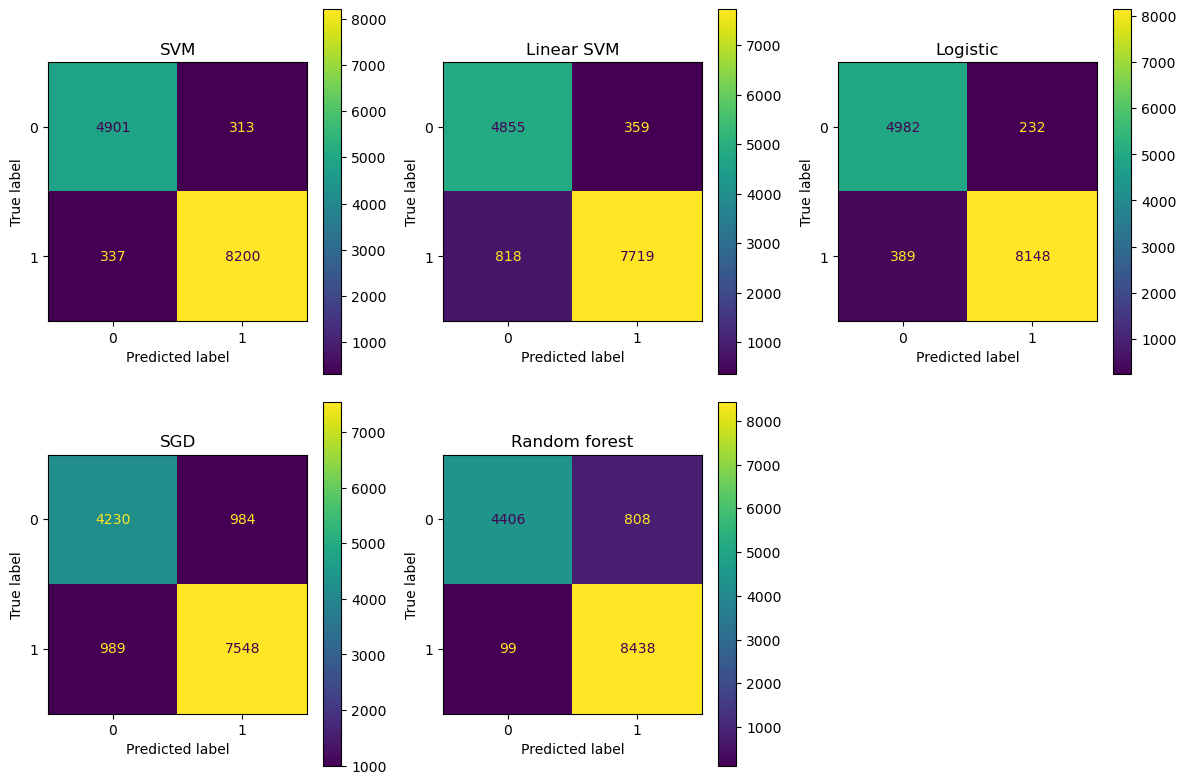

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

# Define the titles for your plots
titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over confusion matrices and titles together
for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

# Hide the unused subplot (if there are less plots than subplots)
if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

As a next step, we will try to reduce dimension using PCA and then again apply the pipeline. 

In [52]:
pca=PCA(n_components=0.90)
arr_pca=pca.fit_transform(dfn.T)
arr_pca.shape

(13751, 465)

In [53]:
dfn_pca=pd.DataFrame(arr_pca,index=dfn.T.index)
dfn_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,455,456,457,458,459,460,461,462,463,464
"""AAAAAACCCGGC_Normoxia""",5.672238,-1.293845,-0.929763,1.115836,-0.017845,-0.875475,-0.187506,0.578794,-3.053432,-0.905141,...,0.819017,0.674133,0.346177,0.522076,-0.016205,0.222900,0.237657,0.381817,0.010951,0.190680
"""AAAACCGGATGC_Normoxia""",-1.514247,4.208290,2.829510,5.647993,-0.541645,-1.103496,1.766432,-1.471880,-1.779120,0.432313,...,-0.100465,0.166001,0.271878,-0.084034,-0.015075,-0.221115,-0.133726,0.116428,-0.180186,-0.089386
"""AAAACGAGCTAG_Normoxia""",1.682418,3.755628,-0.751394,2.665624,-0.347186,-0.028130,4.578904,0.511902,-0.233595,-0.296877,...,0.094459,0.018508,-0.031100,0.095160,-0.113976,0.005022,-0.027588,0.057365,0.028964,-0.093583
"""AAAAGCCTACCC_Normoxia""",6.069433,-1.950165,8.788950,-2.104673,-1.794341,-3.024686,-0.375563,-1.280709,0.264050,-1.632843,...,-0.111857,-0.255374,-0.067673,-0.074823,0.046869,-0.165671,-0.036512,-0.212430,-0.063905,-0.220145
"""AAACCAAGCCCA_Normoxia""",0.999777,1.165891,-1.398268,-2.115528,0.586233,-0.292133,-2.262387,-0.548133,1.051474,-1.149681,...,-0.097333,0.171073,0.077745,-0.158194,-0.076132,-0.030325,-0.166391,-0.070852,0.475403,0.057266


PCA, as we can see, selected 465 principal components. Below, we proceed with running the pipeline again and plotting the confusion matrix.

In [54]:
# define train and test data
X_train = dfn_pca
y_train = target_binary
X_test = df_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [55]:

import warnings
warnings.filterwarnings('ignore')

# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC(C=0.1, gamma=0.01, kernel= 'sigmoid'))   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC(loss='hinge', penalty="l2")) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression(C=0.1, penalty='l1', solver="saga"))
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier(alpha=0.01, eta0=20, learning_rate='constant', loss='hinge', penalty='l1'))
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=100))
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic"]:
       
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        pipeline.fit(X_train, y_train)
        
    else:
       
        pipeline.fit(X_train, y_train)
        
    
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   F1 Score |
|----+---------------+------------+-------------+----------+------------|
|  0 | svm           |   0.937167 |    0.948032 | 0.95092  |   0.949474 |
|  1 | linear_svm    |   0.956802 |    0.967609 | 0.962282 |   0.964938 |
|  2 | logistic      |   0.958402 |    0.968364 | 0.964507 |   0.966432 |
|  3 | sgd           |   0.851062 |    0.859965 | 0.871852 |   0.865868 |
|  4 | random_forest |   0.867863 |    0.843528 | 0.972473 |   0.903422 |
+----+---------------+------------+-------------+----------+------------+


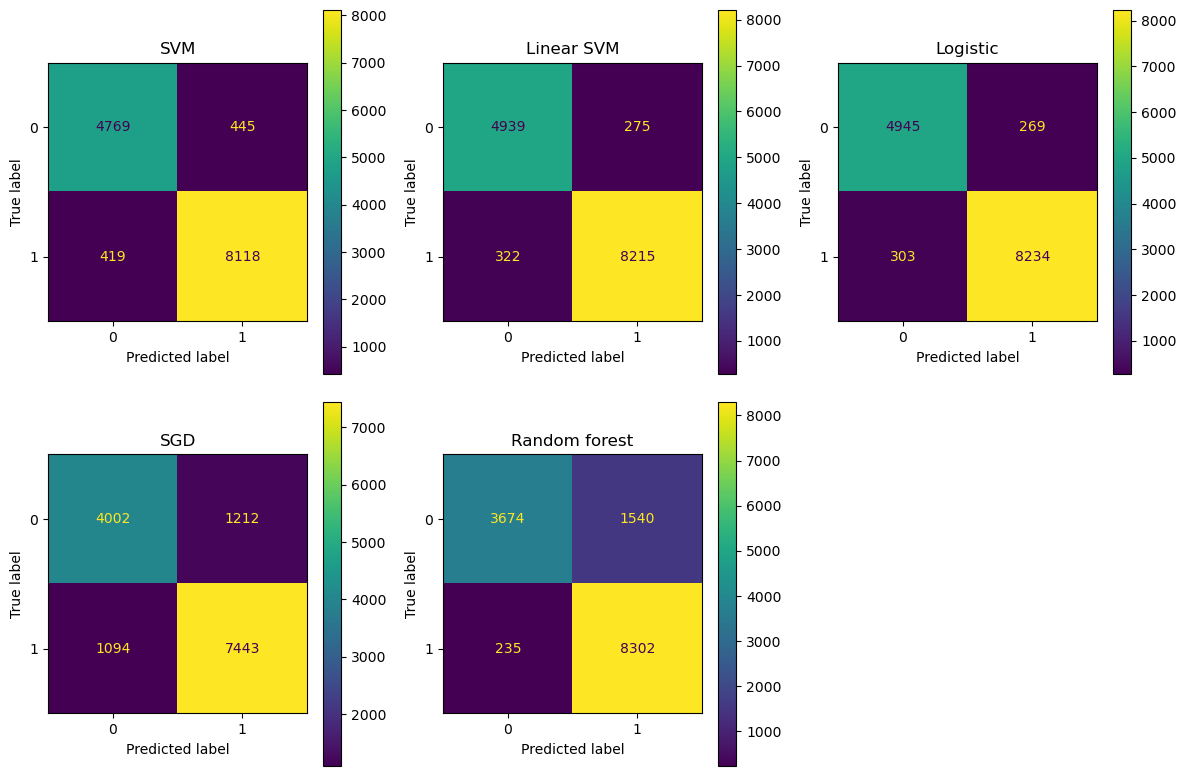

In [56]:

confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

# **Predictions**

In [57]:
conditions = []
for cell in dfn.columns:
    if "Hypoxia" in cell:
        conditions.append("Hypoxia")
    else:
        conditions.append("Normoxia")


In [58]:
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

In [59]:
df_test = pd.read_csv("HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ", engine='python', index_col=0)

X_train = dfn.T
y_train = target_binary
X_test = df_test.T

In [60]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
best_model = LogisticRegression(C=0.1, penalty='l1', solver="saga")

In [62]:
best_model.fit(X_train_scaled, y_train)
predictions = best_model.predict(X_test_scaled)

In [63]:
final_predictions = []

for i in predictions:
    if i==1:
        final_predictions.append('Hypoxia')
    else:
        final_predictions.append('Normoxia')


In [64]:
np.savetxt('HCC1806_DropSeq_Predictions.txt', final_predictions, fmt='%s')